<a href="https://colab.research.google.com/github/Roborueslbff/SpOoNs/blob/main/SimpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [108]:
# create a model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # hidden layer 1( number of neurons) -->
  # H2 (n)... -->
  # output layer (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [109]:
# pick a manual seed for randomization
torch.manual_seed(15)
# create an instance of the model
model = Model()

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [112]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [113]:
# replaced species names with floats
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-113-1f032c088e6b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [114]:
# train, test, split; set x, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [115]:
X = X.values
y = y.values

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [118]:
# convert x features into float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [119]:
# convert y labels to tensor labels
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [120]:
# set the criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()
# choose an adam optimiser, and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [121]:
# model training
epochs = 500
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) #get predicted answer

  # measure loss, will be high at first
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 5 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # now for back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1074497699737549
Epoch: 5 and loss: 1.0683742761611938
Epoch: 10 and loss: 1.0384939908981323
Epoch: 15 and loss: 1.0186383724212646
Epoch: 20 and loss: 1.002162218093872
Epoch: 25 and loss: 0.9869927167892456
Epoch: 30 and loss: 0.9726912379264832
Epoch: 35 and loss: 0.9587843418121338
Epoch: 40 and loss: 0.9450591802597046
Epoch: 45 and loss: 0.9317389130592346
Epoch: 50 and loss: 0.9194428324699402
Epoch: 55 and loss: 0.9086753726005554
Epoch: 60 and loss: 0.8983482122421265
Epoch: 65 and loss: 0.8879396915435791
Epoch: 70 and loss: 0.8774062991142273
Epoch: 75 and loss: 0.8667487502098083
Epoch: 80 and loss: 0.8559946417808533
Epoch: 85 and loss: 0.845180869102478
Epoch: 90 and loss: 0.8343941569328308
Epoch: 95 and loss: 0.8236687183380127
Epoch: 100 and loss: 0.8129531741142273
Epoch: 105 and loss: 0.8022633194923401
Epoch: 110 and loss: 0.7916404604911804
Epoch: 115 and loss: 0.7811386585235596
Epoch: 120 and loss: 0.7709547877311707
Epoch: 125 and loss: 0.7

Text(0.5, 0, 'epochs')

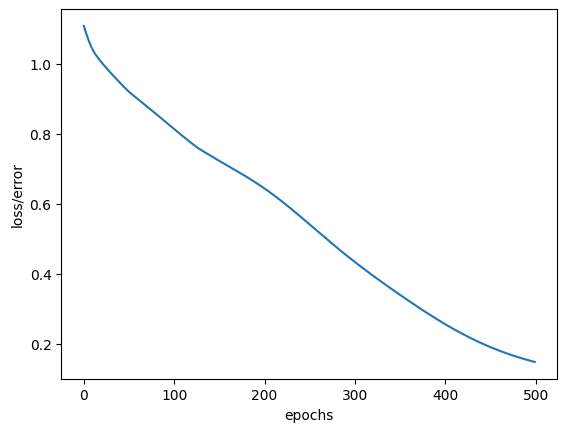

In [122]:
# GRAPHS
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('epochs')

In [123]:
# Evaluate model on test data set (validate model on test set)
with torch.no_grad(): # basically turns off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions.
  loss = criterion(y_eval, y_test) # find the loss or error

In [124]:
loss

tensor(0.1280)

In [125]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}') # this will tell us what prediction the network is giving out

    # this will tell us if the network is correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'we got {correct} correct.')

1.) tensor([ 2.6803, -0.6149, -3.4663]) 	 0 	 0
2.) tensor([-1.7642,  2.3244,  0.0166]) 	 1 	 1
3.) tensor([-2.3417,  2.1922,  1.3475]) 	 1 	 1
4.) tensor([ 2.6481, -0.5582, -3.5127]) 	 0 	 0
5.) tensor([ 2.8815, -0.6233, -3.8404]) 	 0 	 0
6.) tensor([-2.3537,  2.2618,  1.2572]) 	 1 	 1
7.) tensor([-4.9240,  2.6714,  5.5565]) 	 2 	 2
8.) tensor([-0.1937,  1.3694, -1.3050]) 	 1 	 1
9.) tensor([-1.6354,  2.0653,  0.2060]) 	 1 	 1
10.) tensor([-4.3913,  2.4039,  4.9612]) 	 2 	 2
11.) tensor([-3.1448,  2.3748,  2.5972]) 	 2 	 2
12.) tensor([-1.7870,  2.4580, -0.1758]) 	 1 	 1
13.) tensor([-1.7346,  2.5331, -0.4070]) 	 1 	 1
14.) tensor([-1.4836,  2.3012, -0.4934]) 	 1 	 1
15.) tensor([-3.9794,  2.3922,  4.1988]) 	 2 	 2
16.) tensor([ 2.6122, -0.5006, -3.5390]) 	 0 	 0
17.) tensor([-1.5709,  2.2911, -0.3028]) 	 1 	 1
18.) tensor([-5.2712,  2.3200,  6.8276]) 	 2 	 2
19.) tensor([ 2.7527, -0.6136, -3.6170]) 	 0 	 0
20.) tensor([-4.2396,  2.7712,  4.0327]) 	 2 	 2
21.) tensor([-1.4075,  2.3000